[![G-Node GIN](https://gin.g-node.org/img/favicon.png)](https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al/)
**👈🏼 Click to open in G-Node GIN repository!**

</br>

</br>

# 1. Dataset information

A set of high-density EEG (electroencephalogram) recording obtained from awake, freely-moving mice (*mus musculus*) (n = 6). Details of experimental method are described in the original research article using the same dataset [Hwang et al., 2019, *Brain Structure and Function*].

* Title: Dataset of high-density EEG recordings with auditory and optogenetic stimulation in mice
* Authors: Eunjin Hwang, Hio-Been Han, Jung Young Kim, & Jee Hyun Choi [corresponding: jeechoi@kist.re.kr]
* Version: 2.0.2
* Related publication: [Hwang et al., 2019, *Brain Structure and Function*](https://link.springer.com/article/10.1007/s00429-019-01845-5).
* Dataset repository: G-Node GIN (DOI: 10.12751/g-node.e5tyek/ https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al/)

**Step-by-step tutorial is included, fully functioning with _Google Colaboratory_ environment.**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1S3iMT5zQKsJFlhJOt9WsqKcc8dDJXe89)

# 2. File organization

Raw EEG data are saved in EEGLAB dataset format (*.set). Below are the list of files included in this dataset.

**a) Meta data file (1 csv file)**

    [metadata.csv]
    
**b) Electrode montage file (1 csv file)**

    [montage.csv]
    
**c) Dataset 1 (Sound stimulation) - EEG data files (6 set files, 6 fdt files)**  

    [dataset_1/epochs_animal1.set, dataset_1/epochs_animal1.fdt]
    [dataset_1/epochs_animal2.set, dataset_1/epochs_animal2.fdt]
    [dataset_1/epochs_animal3.set, dataset_1/epochs_animal3.fdt]
    [dataset_1/epochs_animal4.set, dataset_1/epochs_animal4.fdt]
    [dataset_1/epochs_animal5.set, dataset_1/epochs_animal5.fdt]
    [dataset_1/epochs_animal6.set, dataset_1/epochs_animal6.fdt]

**d) Dataset 2 (Sound & Optogenetic stimulation) - EEG data files (6 set files, 6 fdt files)**

    [dataset_2/epochs_animal1.set, dataset_2/epochs_animal1.fdt]
    [dataset_2/epochs_animal2.set, dataset_2/epochs_animal2.fdt]
    [dataset_2/epochs_animal3.set, dataset_2/epochs_animal3.fdt]
    [dataset_2/epochs_animal4.set, dataset_2/epochs_animal4.fdt]
    [dataset_2/epochs_animal5.set, dataset_2/epochs_animal5.fdt]
    [dataset_2/epochs_animal6.set, dataset_2/epochs_animal6.fdt]

**e) Analysis demonstration (Python scripts)**

    [analysis_tutorial.ipynb]
     * written and tested on Google Colab - Python 3 environment
    

# 3. How to get started (Python 3 without _gin_)
As the data are saved in EEGLAB format, you need to install appropriate module to access the data in Python3 environment. The fastest way would be to use <code>read_epochs_eeglab()</code> function in *MNE-python* module. You can download the toolbox from the link below (or use <code>pip install mne</code> in terminal shell).


*[MNE-python]* https://martinos.org/mne/stable/index.html

## Part 1. Accessing dataset

### 1-1. Download dataset and MNE-python module

The dataset has been uploaded on G-Node and can be accessed by git command, by typing <code>git clone https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al</code>. However, it's currently not functioning because of the large size of each dataset (>100 MB). Instead, you can use *gin* command or custom function written below to copy dataset into your work environment. In *gin* repository, a python script <code>download_sample.py</code> is provided. It doesn't require *git* or *gin* command, simply using <code>request</code> module in Python 3. Try typing <code>python download_sample.py</code> on terminal/command after changing desired directory. Demo 1-1 is composed of download_sample.py script in this Jupyter-Notebook document.

> Warning: Direct cloning using *git clone git@gin.g-node.org:/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al.git* may not work because of the large size of each dataset (>100 MB). Try python script for downloading below, or try using *git-annex*.

Also, you need to install *MNE-Python* module using *pip* command to load EEGLAB-formatted EEG data. Install command using *pip* is located at the end of script <code>download_sample.py</code>. To download dataset and install MNE-python module into your environment (local machine/COLAB), try running scripts below.

> Note: Through this step-by-step demonstration, we will use data from one animal (Animal #2). Unnecessary data files will not be downloaded to prevent prolonged download time. To download whole dataset, change <code>dataset_to_download = [2]</code> into <code>dataset_to_download = [1,2,3,4,5,6]</code>.

In [1]:
# Demo 1-1. Setting an enviroment (download_sample.py)
from os import listdir, mkdir, path, system, getcwd
import warnings; warnings.simplefilter("ignore")
dir_origin = dir_origin = getcwd()+'/' # <- Change this in local machine
dir_dataset= 'dataset/'
print('\n1)============ Start Downloading =================\n')
print('Target directory ... => [%s%s]'%(dir_origin,dir_dataset))

#!rm -rf /content/dataset/
import requests, time
def download_dataset( animal_list = range(1,7), dir_dataset = dir_dataset ):
  # Check directory
  if not path.isdir('%s%s'%(dir_origin,dir_dataset)):
    mkdir('%s%s'%(dir_origin,dir_dataset))
    mkdir('%s%s/dataset_1/'%(dir_origin,dir_dataset))
    mkdir('%s%s/dataset_2/'%(dir_origin,dir_dataset))

  # File names to be downloaded
  file_ids = [ 'meta.csv', 'montage.csv' ]
  for set_id in animal_list:
    file_ids.append( 'dataset_1/epochs_animal%s.set'%set_id )
    file_ids.append( 'dataset_1/epochs_animal%s.fdt'%set_id )
    file_ids.append( 'dataset_2/epochs_animal%s.set'%set_id )
    file_ids.append( 'dataset_2/epochs_animal%s.fdt'%set_id )

  # Request & download
  repo_url = 'https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al/raw/b986d72322caa0ec76f02211dcc5c1df45d8366e/'
  for file_id in file_ids:
    fname_dest = "%s%s%s"%(dir_origin, dir_dataset, file_id)
    if path.isfile(fname_dest) is False:
      print('...copying to [%s]...'%fname_dest)
      file_url = '%s%s'%(repo_url, file_id)
      r = requests.get(file_url, stream = True)
      with open(fname_dest, "wb") as file:
          for block in r.iter_content(chunk_size=1024):
              if block: file.write(block)
      time.sleep(1) # wait a second to prevent possible errors
    else:
      print('...skipping already existing file [%s]...'%fname_dest)

# Initiate downloading
animal_list = [2] # Partial download to prevent long download time
#animal_list = [1,2,3,4,5,6] # Full download 
download_dataset(animal_list)
print('\n============= Download finished ==================\n\n')

# List up 'dataset/' directory
print('\n2)=== List of available files in google drive ====\n')
print(listdir('%sdataset/'%dir_origin))
print('\n============= End of the list ==================\n\n')

# Install mne-python module
system('pip install mne');

# Make figure output directory
dir_fig = 'figures/'
if not path.isdir(dir_fig): mkdir('%s%s'%(dir_origin, dir_fig))


1)============ Start Downloading =================

Target directory ... => [/content/dataset/]
...copying to [/content/dataset/meta.csv]...
...copying to [/content/dataset/montage.csv]...
...copying to [/content/dataset/dataset_1/epochs_animal2.set]...
...copying to [/content/dataset/dataset_1/epochs_animal2.fdt]...
...copying to [/content/dataset/dataset_2/epochs_animal2.set]...
...copying to [/content/dataset/dataset_2/epochs_animal2.fdt]...

============= Download finished ==================



2)=== List of available files in google drive ====

['meta.csv', 'dataset_2', 'dataset_1', 'montage.csv']

============= End of the list ==================




### 1-2. Accessing meta-data table

File *meta.csv* contains the detailed information of dataset, including subject demographics, number of trials, etc.  
Using <code>read_csv()</code> of *pandas* module, meta-datat able can be visualized as follow. 




In [ ]:
## Demo 1-2. Display meta-data file
from pandas import read_csv
meta = read_csv('%s%smeta.csv'%(dir_origin, dir_dataset));
print('Table 1. Meta-data')
meta

Table 1. Meta-data


,subject_name,age_in_week,sex,n_set1_10Hz,n_set1_20Hz,n_set1_30Hz,n_set1_40Hz,n_set1_50Hz,n_set2_soundonly,n_set2_advanced,n_set2_inphase,n_set2_oop,n_set2_delayed
0,animal1,4,male,95,95,98,84,94,84,84,79,88,82
1,animal2,4,male,98,95,97,87,98,87,79,74,77,83
2,animal3,4,male,96,95,97,53,93,53,56,45,51,50
3,animal4,4,female,98,96,95,72,98,72,76,71,70,72
4,animal5,5,male,191,191,189,176,189,176,86,167,96,89
5,animal6,4,male,196,194,195,179,194,179,86,179,77,86


### 1-3. Data loading and dimensionality check

Each _*.fdt_ file is consisted of different number of trials. To load dataset, a function <code>get_eeg_data()</code> is defined below. To maintain original dimensionality order (cf. channel-time-trial in EEGLAB of Matlab), <code>np.moveaxis()</code> was applied. 


In [ ]:
# Demo 1-3. Data loading and dimensionality check
from mne.io import read_epochs_eeglab as loadeeg
import numpy as np
def get_eeg_data(animal_idx=1, dataset_idx=1, CAL=1e-6):
  f_name = '%s%sdataset_%s/epochs_%s.set'%(dir_origin,dir_dataset,dataset_idx,meta.subject_name[animal_idx])
  EEG = loadeeg(f_name, verbose=False)
  EEG.data = np.moveaxis(EEG.get_data(), 0, 2) / CAL
  return EEG, f_name

# Data loading
EEG, f_name = get_eeg_data( animal_idx = 1, dataset_idx = 1 ) 

# Dimension check
print('File name  :  [%s]'%f_name)
print('File contains [%d channels, %4d time points, %3d trials]'%(EEG.data.shape))

File name  :  [/content/dataset/dataset_1/epochs_animal2.set]
File contains [38 channels, 5200 time points, 475 trials]


Note that voltage calibration value (*CAL*) is set to 1e-6 in 0.11.0 version of [eeglab.py](https://github.com/mne-tools/mne-python/blob/master/mne/io/eeglab/eeglab.py]).


### 1-4. Getting channel coordinates

The EEG data are recorded with 38 electrode array, and two of the electrodes were used as ground and reference site - total 36 channel data are available. Coordinates of each electrode are in the file [data/montage.csv], and can be accessed and visualized by following script.


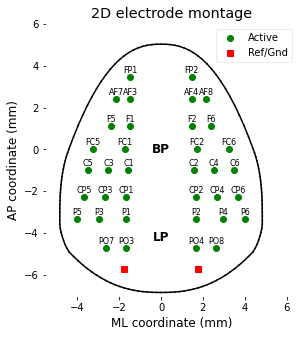

In [ ]:
# Demo 1-4. Import montage matrix
from matplotlib import pyplot as plt; plt.style.use('ggplot')
plt.rcParams['font.family']='sans-serif'
plt.rcParams['text.color']='black'; plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'; plt.rcParams['ytick.color']='black'

from pandas import read_csv
montage_table = read_csv('%s%smontage.csv'%(dir_origin, dir_dataset))
elec_montage = np.array(montage_table)[:, 1:3]

# Open figure handle
plt.figure(figsize=(4.5,5))

# Plot EEG channels position (total 36 channels)
plt.plot( elec_montage[:36,0], elec_montage[:36,1], 'go' )
for chanIdx in range(36):
  plt.text( elec_montage[chanIdx,0], elec_montage[chanIdx,1]+.2,
           EEG.info['ch_names'][chanIdx][5:], ha='center', fontsize=8 )

# Plot Ref/Gnd electrode position
plt.plot( elec_montage[36:,0], elec_montage[36:,1], 'rs' )
plt.text(0, 0.0, 'BP', fontsize=12, weight='bold', ha='center',va='center');
plt.text(0,-4.2, 'LP', fontsize=12, weight='bold', ha='center',va='center');

plt.xlabel('ML coordinate (mm)'); plt.ylabel('AP coordinate (mm)');
plt.title('2D electrode montage');
plt.legend(['Active','Ref/Gnd'], loc='upper right', facecolor='w');
plt.gca().set_facecolor((1,1,1))
plt.grid(False); plt.axis([-5.5, 6.5, -7, 6])

# Draw head boundary
def get_boundary():
 return np.array([
    -4.400, 0.030, -4.180, 0.609, -3.960, 1.148, -3.740, 1.646, -3.520, 2.105, -3.300, 2.525, -3.080, 2.908, -2.860, 3.255,
    -2.640, 3.566, -2.420, 3.843, -2.200, 4.086, -1.980, 4.298, -1.760, 4.4799, -1.540, 4.6321, -1.320, 4.7567, -1.100, 4.8553,
    -0.880, 4.9298, -0.660, 4.9822, -0.440, 5.0150, -0.220, 5.0312,0, 5.035, 0.220, 5.0312, 0.440, 5.0150, 0.660, 4.9822,
    0.880, 4.9298, 1.100, 4.8553, 1.320, 4.7567, 1.540, 4.6321,1.760, 4.4799, 1.980, 4.2986, 2.200, 4.0867, 2.420, 3.8430,
    2.640, 3.5662, 2.860, 3.2551, 3.080, 2.9087, 3.300, 2.5258,3.520, 2.1054, 3.740, 1.6466, 3.960, 1.1484, 4.180, 0.6099,
    4.400, 0.0302, 4.400, 0.0302, 4.467, -0.1597, 4.5268, -0.3497,4.5799, -0.5397, 4.6266, -0.7297, 4.6673, -0.9197, 4.7025, -1.1097,
    4.7326, -1.2997, 4.7579, -1.4897, 4.7789, -1.6797, 4.7960, -1.8697,4.8095, -2.0597, 4.8199, -2.2497, 4.8277, -2.4397, 4.8331, -2.6297,
    4.8366, -2.8197, 4.8387, -3.0097, 4.8396, -3.1997, 4.8399, -3.3897,4.8384, -3.5797, 4.8177, -3.7697, 4.7776, -3.9597, 4.7237, -4.1497,
    4.6620, -4.3397, 4.5958, -4.5297, 4.5021, -4.7197, 4.400, -4.8937,4.1800, -5.1191, 3.9600, -5.3285, 3.7400, -5.5223, 3.5200, -5.7007,
    3.3000, -5.8642, 3.0800, -6.0131, 2.8600, -6.1478, 2.6400, -6.2688,2.4200, -6.3764, 2.2000, -6.4712, 1.9800, -6.5536, 1.7600, -6.6241,
    1.5400, -6.6833, 1.3200, -6.7317, 1.1000, -6.7701, 0.8800, -6.7991,0.6600, -6.8194, 0.4400, -6.8322, 0.2200, -6.8385, 0, -6.840,
    -0.220, -6.8385, -0.440, -6.8322, -0.660, -6.8194, -0.880, -6.7991,-1.100, -6.7701, -1.320, -6.7317, -1.540, -6.6833, -1.760, -6.6241,
    -1.980, -6.5536, -2.200, -6.4712, -2.420, -6.3764, -2.640, -6.2688,-2.860, -6.1478, -3.080, -6.0131, -3.300, -5.8642, -3.520, -5.7007,
    -3.740, -5.5223, -3.960, -5.3285, -4.180, -5.1191, -4.400, -4.89370,-4.5021, -4.7197, -4.5958, -4.5297, -4.6620, -4.3397, -4.7237, -4.1497,
    -4.7776, -3.9597, -4.8177, -3.7697, -4.8384, -3.5797, -4.8399, -3.3897,-4.8397, -3.1997, -4.8387, -3.0097, -4.8367, -2.8197, -4.8331, -2.6297,
    -4.8277, -2.4397, -4.8200, -2.2497, -4.8095, -2.0597, -4.7960, -1.8697,-4.7789, -1.6797, -4.7579, -1.4897, -4.7326, -1.2997, -4.7025, -1.1097,
    -4.6673, -0.9197, -4.6266, -0.7297, -4.5799, -0.5397, -4.5268, -0.3497,-4.4670, -0.1597, -4.4000, 0.03025]).reshape(-1, 2)
boundary = get_boundary()
for p in range(len(boundary)-1): plt.plot(boundary[p:p+2,0],boundary[p:p+2,1], 'k-')
plt.gcf().savefig(dir_fig+'fig1-4.png', format='png', dpi=300);

## Part 2. Plotting Event-Related Potentials

### 2-1. Accessing event info

Event information is saved in struct-type variable EEG.event and you can access it by typing <code>EEG.event</code>. Also, their time trace are avilable in 37-th and 38-th channel of <code>EEG.data</code>. For demonstration purpose, light and sound stimuli of 7 different types of event can be extracted and drawn as follow.

Event info for dataset #1


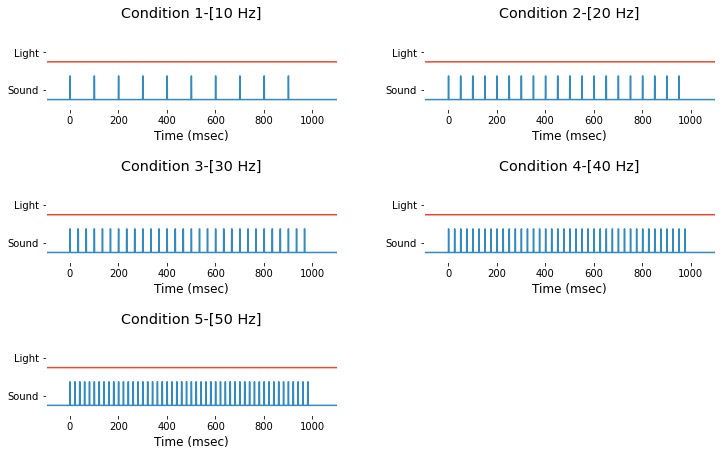

Event info for dataset #2


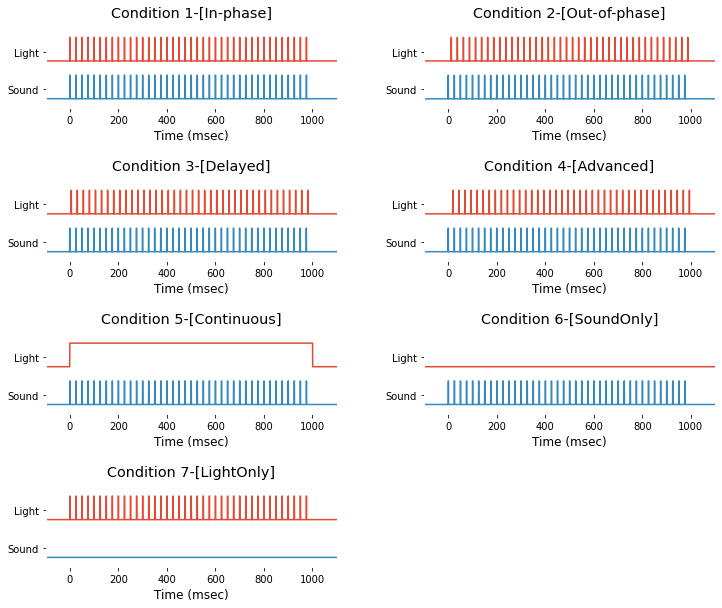

In [ ]:
# Demo 2-1a. Event profile (sound/light stimuli)
for dataset_idx in [1, 2]:
  print('Event info for dataset #%s'%dataset_idx)
  EEG, f_name = get_eeg_data( animal_idx = 1, dataset_idx = dataset_idx ) 
  if dataset_idx == 1:
    condNames = ['1-[10 Hz]', '2-[20 Hz]', '3-[30 Hz]', '4-[40 Hz]', '5-[50 Hz]'];
  else:
    condNames = ['1-[In-phase]', '2-[Out-of-phase]', '3-[Delayed]', '4-[Advanced]', '5-[Continuous]', '6-[SoundOnly]', '7-[LightOnly]'];

  plt.figure(figsize=(12,10))
  yshift = .8;
  for condition in range(1,len(condNames)+1):
    plt.subplot(4,2,condition)
    trialIdx = np.where(EEG.events[:,2]==EEG.event_id[condNames[condition-1]])[0]

    # Light stim
    light = EEG.data[-2,:,trialIdx[0]] + yshift
    plt.plot( EEG.times*1000, light)
    
    # Sound stim
    sound = EEG.data[-1,:,trialIdx[0]] - yshift 
    plt.plot( EEG.times*1000, sound)
    
    plt.ylim([-1.5*yshift, 3*yshift])
    plt.xlim([-.10*1000, 1.10*1000])
    plt.xlabel('Time (msec)')
    plt.yticks( (yshift*-.5,yshift*1.5), labels=['Sound', 'Light'] )
    plt.title('Condition %s'%(condNames[condition-1]))
    plt.gca().set_facecolor((1,1,1))
  plt.subplots_adjust(wspace=.3, hspace=.8)
  plt.gcf().savefig(dir_fig+'fig2-1_dataset_%s.png'%dataset_idx, format='png', dpi=300);
  plt.show()


### 2-2. Visualizing example single-trial trace

If data is successfully loaded, now you're ready! For data visualization, an example function is provided below. 

The function <code>plot_multichan()</code> draws multi-channel time series data, by taking 1D time vector, <code>x</code>, and 2D data matrix, <code>y</code>.  

In this example, we'll use Dataset 2 as it shows much clear difference across the different stimulation conditions.

In [ ]:
# Demo 2-2a. Function for multi-channel plotting
import numpy as np; from matplotlib import pyplot as plt
def plot_multichan( x, y, spacing = 3000, figsize = (10,10), ch_names = EEG.ch_names ):
  # Set color theme
  color_template = np.array([[1,.09,.15],[1,.75,.28],[.4,.2,0],[.6,.7,.3],[.55,.55,.08]])
  color_space = np.tile( color_template, 
                      (int(np.ceil([ float(y.shape[0])/color_template.shape[0]])[0]), 1) )
  # Open figure and plot
  plt.figure(figsize=figsize)
  y_center = np.linspace( -spacing, spacing, int(y.shape[0]) )
  for chanIdx in range(y.shape[0]):
    shift = y_center[chanIdx] + np.nanmean(y[chanIdx,:])
    plt.plot(x, y[chanIdx,:]-shift, color=color_space[chanIdx,], linewidth=1);
  plt.xlabel('Time (sec)')
  plt.ylim((-1.1*spacing,1.1*spacing))
  plt.yticks(y_center, ch_names[::-1]);
  plt.gca().set_facecolor((1,1,1))
  return y_center

Using <code>plot_multichan()</code> function, example single-trial EEG trace can be visualized as follow.

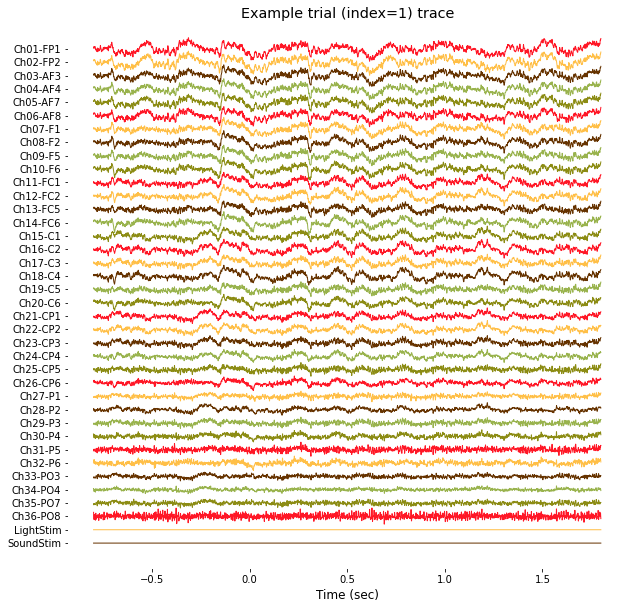

In [ ]:
# Demo 2-2b. Visualization of raw EEG time trace

# Load dataset
EEG, f_name = get_eeg_data( animal_idx = 1, dataset_idx = 2 ) 

# Plot
trial_index = 0
y_center = plot_multichan(EEG.times, EEG.data[:,:,trial_index])
plt.title('Example trial (index=%d) trace'%(1+trial_index));
plt.gcf().savefig(dir_fig+'fig2-2.png', format='png', dpi=300);

Note that channels 1 to 36 contain actual EEG data from 36-channel electrode array (from FP1 to PO8), and channel 37 and 38 contain binary stimulus profile (0: no stimulation, 1: stimulation) of light and sound, respectively. 

### 2-3. ERP in time domain

Using same function, <code>plot_multichan()</code>, ERP (Event-related potentials) trace can be drawn as follow.

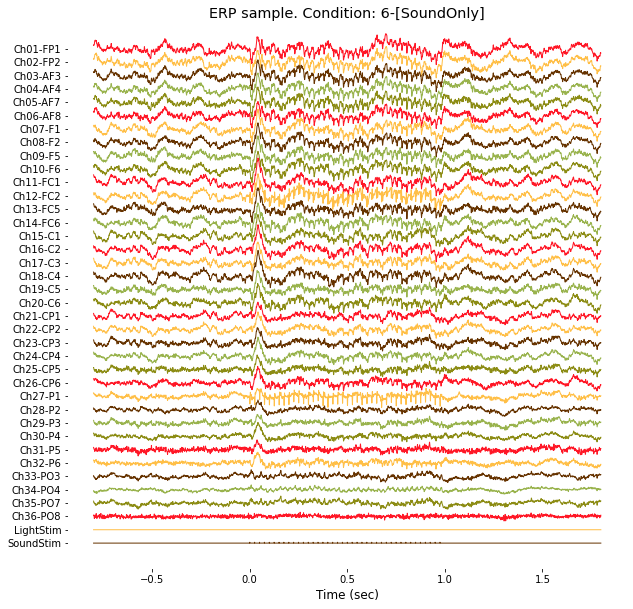

In [ ]:
# Demo 2-3. Visualization of ERP time trace
targetCondition = 6 # <- Try changing this
trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]
erp = np.nanmean(EEG.data[:,:,trialIdx],2)
c = plot_multichan(EEG.times, erp, spacing = 300 )
plt.title('ERP sample. Condition: %s'%(condNames[targetCondition-1]));
plt.gcf().savefig(dir_fig+'fig2-3.png', format='png', dpi=300);

### 2-4. ERP in frequency domain

To calculate the amplitude of 40-Hz auditory steady-state response, fast Fourier transform can be applied as follow. 

Channel selection
..Frontal channels -> ['Ch03-AF3', 'Ch04-AF4', 'Ch05-AF7', 'Ch06-AF8']
..Parietal channels -> ['Ch21-CP1', 'Ch22-CP2', 'Ch23-CP3', 'Ch24-CP4']



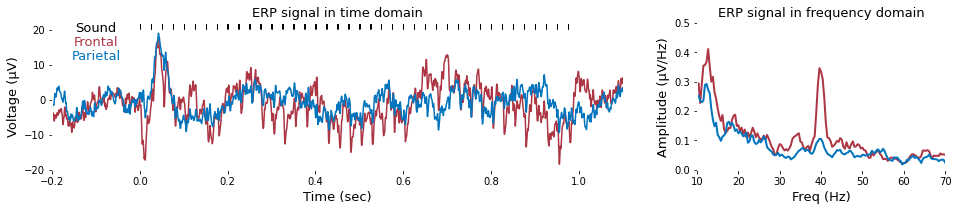

In [ ]:
# Demo 2-4. Time- and frequency-domain visualization of grand-averaged ERP
def fft_half(x, Fs=2000): return np.fft.fft(x)[:int(len(x)/2)]/len(x), np.linspace(0,Fs/2,int(len(x)/2))
plt.figure(figsize=(16,3))
trialIdx = np.where((EEG.events[:,2])==6)[0]

# Channel selection
ch_frontal = (2,6) # channel index of frontal electrodes 
ch_parietal = (20,24) # channel index of parietal electrodes
print( 'Channel selection\n..Frontal channels -> %s'%EEG.info['ch_names'][ch_frontal[0]:ch_frontal[1]] )
print( '..Parietal channels -> %s\n'%EEG.info['ch_names'][ch_parietal[0]:ch_parietal[1]] )

# Calc ERP traces for visualization
erp = np.mean(EEG.data[:,:,trialIdx],2)
frontal_erp = np.mean(erp[ch_frontal[0]:ch_frontal[1],:],0)     # Average of frontal-area channels
parietal_erp = np.mean(erp[ch_parietal[0]:ch_parietal[1],:],0)  # Average of parietal-area channels
frontal_erp_fft,freq = fft_half(frontal_erp)
parietal_erp_fft,freq = fft_half(parietal_erp)
sound_stim = np.where(erp[-1,:])[0]

# Plot ERP (Time)
font_size = 13
color_f = (.68,.210,.27) # Custom color value
color_p = (.01,.457,.74)
plt.subplot(1,3,(1,2))
plt.grid('off')
plt.plot( EEG.times, frontal_erp,  color= color_f)
plt.plot( EEG.times, parietal_erp, color= color_p)
plt.xlim((-.2,1.1))
plt.ylim((-20,22))
plt.text( -.1, 19.5, 'Sound', ha='center', fontsize=font_size, color='k' )
plt.text( -.1, 15.5, 'Frontal', ha='center', fontsize=font_size, color=color_f )
plt.text( -.1, 11.5,'Parietal', ha='center', fontsize=font_size, color=color_p )
plt.title('ERP signal in time domain', fontsize=font_size)
plt.xlabel('Time (sec)', fontsize=font_size)
plt.ylabel('Voltage (μV)', fontsize=font_size)
plt.plot( EEG.times[sound_stim], np.zeros(sound_stim.shape)+21, 'k|' )
plt.gca().set_facecolor((1,1,1))
  
# Plot ERP (Frequency)
def smoothing(x, L=5): # smoothing function
    return np.convolve(np.ones(L,'d')/np.ones(L,'d').sum(),
    np.r_[x[L-1:0:-1],x, x[-2:-L-1:-1]],mode='valid')[round((L-1)*.5):round(-(L-1)*.5)]
plt.subplot(1,3,3)
plt.plot( freq, smoothing(np.abs(frontal_erp_fft)), linewidth=2, color=color_f )
plt.plot( freq, smoothing(np.abs(parietal_erp_fft)), linewidth=2, color=color_p )
plt.xlim((10,70))
plt.ylim((0,.5))
plt.xlabel('Freq (Hz)', fontsize=font_size)
plt.ylabel('Amplitude (μV/Hz)', fontsize=font_size)
plt.title('ERP signal in frequency domain', fontsize=font_size)
plt.gca().set_facecolor((1,1,1))
plt.subplots_adjust(wspace=.3, hspace=.1, bottom=.2)

plt.gcf().savefig(dir_fig+'fig2-4.png', format='png', dpi=300);

### 2-5. ERP in time-frequency domain

Applying fast Fourier transform with moving temporal window, ERP signal can be drawn in time-frequency domain. To calculate spectrogram, a function <code>get_spectrogram()</code> is defined.


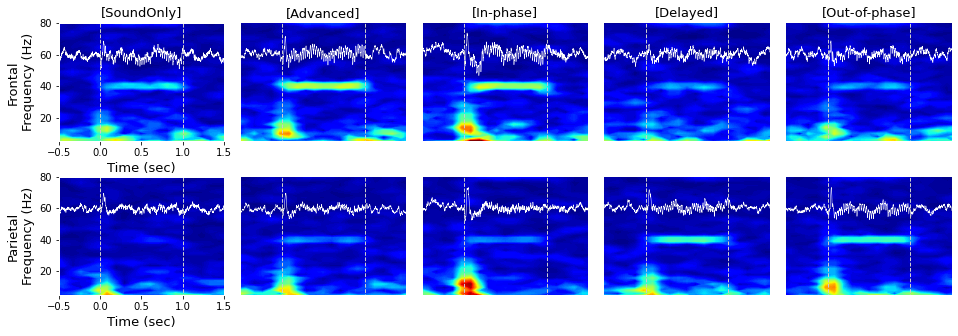

In [ ]:
# Demo 2-5. Visualize frequency components in ERP
def get_spectrogram( data, t=EEG.times, Fs=2000, 
                    fft_win_size=2**10, t_resolution=0.1, freq_cut = 150): 
  
  # For many- and single-trials data compatibility
  if data.ndim < 3: data = np.expand_dims(data,2)
  t_fft = [t[0]+(((fft_win_size*.5)+1)/Fs),
           t[-1]-(((fft_win_size*.5)+1)/Fs)];
  t_vec = np.linspace( t_fft[0], t_fft[-1], int(np.diff(t_fft)/t_resolution)+1);
  
  # Memory pre-occupation
  n_ch, _, n_trial = data.shape
  n_t = len(t_vec);
  _,f = fft_half( np.zeros(fft_win_size), Fs);
  n_f = np.where(f<100)[0][-1]+1;
  Spec = np.zeros( [n_t, n_f, n_ch, n_trial], dtype='float16');
  Spec_f = f[0:n_f];

  # Get sliding window indicies
  idx_collection = np.zeros((len(t_vec),2), dtype='int')
  for tIdx in range(len(t_vec)):
    idx_collection[tIdx,0] = int(np.where(t<t_vec[tIdx])[0][-1]-fft_win_size*.5)
    idx_collection[tIdx,1] = int(np.where(t<t_vec[tIdx])[0][-1]+fft_win_size*.5-1)
  short = np.where(~(np.diff(idx_collection,1)==fft_win_size-1 ))
  idx_collection[short,1] = idx_collection[short,1]+1
  Spec_t = t[np.array(np.mean(idx_collection,1), dtype='int')];

  # Calculation
  hann = np.hanning( fft_win_size-1 );
  for chanIdx in range(n_ch):
    for trialIdx in range(n_trial):
      epoch = data[chanIdx, :, trialIdx];
      for tIdx in range(len(t_vec)):
        d =  hann * epoch[idx_collection[tIdx,0]:idx_collection[tIdx,1]]
        [x,f]= fft_half(d, Fs);
        Spec[tIdx,:,chanIdx,trialIdx] = abs(x[:n_f]);
        
  return np.squeeze(Spec), Spec_t, Spec_f


# Calculation & Visualization
from matplotlib import cm
plt.figure(figsize=(16,5))
conditions = [6,4,1,3,2]
for targetCondition in conditions:
  trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]

  # Calc Frontal Mean
  erp = np.mean(EEG.data[:,:,trialIdx],2)
  Spec, Spec_t, Spec_f = get_spectrogram(erp)
  frontal_Spec = np.mean(Spec[:,:,ch_frontal[0]:ch_frontal[1]],2)
  parietal_Spec = np.mean(Spec[:,:,ch_parietal[0]:ch_parietal[1]],2)
  
  frontal_erp = np.mean(erp[ch_frontal[0]:ch_frontal[1],:],0)
  parietal_erp = np.mean(erp[ch_parietal[0]:ch_parietal[1],:],0)
  
  # Frontal
  plt.subplot(2,len(conditions),np.where(np.array(conditions)==targetCondition)[0]+1)
  plt.contourf( Spec_t, Spec_f, frontal_Spec.transpose(),
               cmap=cm.jet, levels = np.linspace(0,1.8,100))
  if targetCondition==6:
    plt.ylabel('Frontal\nFrequency (Hz)', fontsize=font_size)
    plt.xlabel('Time (sec)', fontsize=font_size)
  else: plt.axis('off')
  plt.title('%s'%condNames[targetCondition-1][2:], fontsize=font_size)
  plt.plot(EEG.times, .5*frontal_erp+60, 'w-', linewidth=.5)
  plt.xlim([-.5,1.5])
  plt.ylim([5,80])
  plt.plot((0,0),(0,100), '--', linewidth = 1, color = (.8,.8,.8))
  plt.plot((1,1),(0,100), '--', linewidth = 1, color = (.8,.8,.8))

  # Parietal
  plt.subplot(2,len(conditions),len(conditions)+np.where(np.array(conditions)==targetCondition)[0]+1)
  plt.contourf( Spec_t, Spec_f, parietal_Spec.transpose(),
               cmap=cm.jet, levels = np.linspace(0,1.8,100))
  if targetCondition==6:
    plt.ylabel('Parietal\nFrequency (Hz)', fontsize=font_size)
    plt.xlabel('Time (sec)', fontsize=font_size)
  else: plt.axis('off')
  plt.plot(EEG.times, .5*parietal_erp+60, 'w-', linewidth=.5)
  plt.xlim([-.5,1.5])
  plt.ylim([5,80])
  plt.plot((0,0),(0,100), '--', linewidth = 1, color = (.8,.8,.8))
  plt.plot((1,1),(0,100), '--', linewidth = 1, color = (.8,.8,.8))

plt.subplots_adjust(wspace=.1, hspace=.3)
#plt.colorbar(orientation="horizontal")
plt.gcf().savefig(dir_fig+'fig2-5.png', format='png', dpi=300);


## Part 3. Drawing topography

### 3-1. Drawing 2D power topography

Using this coordinate, spatial dynamics of ERP can be drawn in 2D plane (i.e., power topography). For visualization purpose, an example function, <code>plot_topo2d( data )</code>, is provided which takes <code>data</code> as 1D data matrix (i.e., 1 x 36 channels) each of which represents the channel power. 

For 2D interpolation, additional *class* of <code>bi_interp2</code> is defined. 

In [ ]:
# Demo 3-1a. Preparation of 2D power topography
""" (1) Class for 2D interpolation """
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
class bi_interp2:
  def __init__(self, x, y, z, xb, yb, xi, yi, method='linear'):
    self.x = x
    self.y = y
    self.z = z
    self.xb = xb
    self.yb = yb
    self.xi = xi
    self.yi = yi
    self.x_new, self.y_new = np.meshgrid(xi, yi)
    self.id_out = np.zeros([len(self.xi), len(self.xi)], dtype='bool')
    self.x_up, self.y_up, self.x_dn, self.y_dn = [], [], [], []
    self.interp_method = method
    self.z_new = []

  def __call__(self):
    self.find_boundary()
    self.interp2d()
    return self.x_new, self.y_new, self.z_new

  def find_boundary(self):
    self.divide_plane()
    # sort x value
    idup = self.sort_arr(self.x_up)
    iddn = self.sort_arr(self.x_dn)
    self.x_up = self.x_up[idup]
    self.y_up = self.y_up[idup]
    self.x_dn = self.x_dn[iddn]
    self.y_dn = self.y_dn[iddn]
    self.remove_overlap()
    # find outline, use monotone cubic interpolation
    ybnew_up = self.interp1d(self.x_up, self.y_up, self.xi)
    ybnew_dn = self.interp1d(self.x_dn, self.y_dn, self.xi)
    for i in range(len(self.xi)):
        idt1 = self.y_new[:, i] > ybnew_up[i]
        idt2 = self.y_new[:, i] < ybnew_dn[i]
        self.id_out[idt1, i] = True
        self.id_out[idt2, i] = True
    # expand data points
    self.x = np.concatenate((self.x, self.x_new[self.id_out].flatten(), self.xb))
    self.y = np.concatenate((self.y, self.y_new[self.id_out].flatten(), self.yb))
    self.z = np.concatenate((self.z, np.zeros(np.sum(self.id_out) + len(self.xb))))

  def interp2d(self):
    pts = np.concatenate((self.x.reshape([-1, 1]), self.y.reshape([-1, 1])), axis=1)
    self.z_new = interpolate.griddata(pts, self.z, (self.x_new, self.y_new), method=self.interp_method)
    self.z_new[self.id_out] = np.nan
    
  def remove_overlap(self):
    id1 = self.find_val(np.diff(self.x_up) == 0, None)
    id2 = self.find_val(np.diff(self.x_dn) == 0, None)
    for i in id1:
      temp = (self.y_up[i] + self.y_up[i+1]) / 2
      self.y_up[i+1] = temp
      self.x_up = np.delete(self.x_up, i)
      self.y_up = np.delete(self.y_up, i)
    for i in id2:
      temp = (self.y_dn[i] + self.y_dn[i + 1]) / 2
      self.y_dn[i+1] = temp
      self.x_dn = np.delete(self.x_dn, i)
      self.y_dn = np.delete(self.y_dn, i)

  def divide_plane(self):
    ix1 = self.find_val(self.xb == min(self.xb), 1)
    ix2 = self.find_val(self.xb == max(self.xb), 1)
    iy1 = self.find_val(self.yb == min(self.yb), 1)
    iy2 = self.find_val(self.yb == max(self.yb), 1)
    # divide the plane with Quadrant
    qd = np.zeros([self.xb.shape[0], 4], dtype='bool')
    qd[:, 0] = (self.xb > self.xb[iy2]) & (self.yb > self.yb[ix2])
    qd[:, 1] = (self.xb > self.xb[iy1]) & (self.yb < self.yb[ix2])
    qd[:, 2] = (self.xb < self.xb[iy1]) & (self.yb < self.yb[ix1])
    qd[:, 3] = (self.xb < self.yb[iy2]) & (self.yb > self.yb[ix1])
    # divide the array with y axis
    self.x_up = self.xb[qd[:, 0] | qd[:, 3]]
    self.y_up = self.yb[qd[:, 0] | qd[:, 3]]
    self.x_dn = self.xb[qd[:, 1] | qd[:, 2]]
    self.y_dn = self.yb[qd[:, 1] | qd[:, 2]]

  def find_val(self, condition, num_of_returns):
    # find the value that satisfy the condition
    ind = np.where(condition == 1)
    return ind[:num_of_returns]

  def sort_arr(self, arr):
    # return sorting index
    return sorted(range(len(arr)), key=lambda i: arr[i])

  def interp1d(self, xx, yy, xxi):
    # find the boundary line
    interp_obj = interpolate.PchipInterpolator(xx, yy)
    return interp_obj(xxi)
  
""" (2) Function for Topography plot """
from pandas import read_csv
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
def plot_topo2d(data, clim=(-15,25), montage_file='%s%smontage.csv'%(dir_origin, dir_dataset), plot_opt = True):

  # Zero-padding
  short = 38-len(data)
  if short: data=np.concatenate((data, np.tile(.00000001, short)), axis=0)

  # Get head boundary image coordinates
  boundary = get_boundary()
  montage_table = read_csv(montage_file)
  x, y = np.array(montage_table['X_ML']), np.array(montage_table['Y_AP'])
  xb, yb = boundary[:, 0], boundary[:, 1]
  xi, yi = np.linspace(min(xb), max(xb), 500),np.linspace(min(yb), max(yb), 500)
  xx, yy, topo_data = bi_interp2(x, y, data, xb, yb, xi, yi)()

  if plot_opt:
    topo_to_draw = topo_data.copy()
    topo_to_draw[np.where(topo_data>clim[1])] = clim[1]
    topo_to_draw[np.where(topo_data<clim[0])] = clim[0]
    plt.contourf(xx, yy, topo_to_draw, cmap=cm.jet, levels = np.linspace(clim[0],clim[1],50))
    plt.grid(False)
    plt.gca().set_aspect('equal','box')
    plt.xlabel('ML coordinate (mm)', fontsize=15);
    plt.ylabel('AP coordinate (mm)', fontsize=15);
    plt.text(0, 0.0, 'BP', color='w', fontsize=10, weight='bold', ha='center',va='center');
    plt.text(0,-4.2, 'LP', color='w', fontsize=10, weight='bold', ha='center',va='center');
    if clim is not None: plt.clim(clim)
    plt.plot(montage_table['X_ML'][0:36],montage_table['Y_AP'][0:36], 'w.')    
    plt.axis( (-5.5, 5.5, -7, 5.2) ) 
    plt.gca().set_facecolor((1,1,1))

  return xx, yy, topo_data


**Optional) Bad channel identification**

In usual EEG recordings, large-amplitude artifacts coming from few bad channels sometimes be a problem. To prevent this, researchers have developed various methods of artifact-rejection and bad-channel selection. Here, simple bad channel identification method is implemented using channel correlation. Data from the bad channels identified here will be ignored in topography and replaced by median value hereafter.

In [ ]:
# Demo 3-1b. Identification of bad-channel using correlation
from scipy.stats import ttest_1samp as ttest
ga_erp = np.nanmean(EEG.data[:36,:,:],2) # grand-averaged ERP
corr_coef = np.corrcoef(ga_erp)
bad_channels = []
for chIdx in range(corr_coef.shape[1]):

  # Eliminating self-correlation
  r_data = corr_coef[chIdx,:].tolist() 
  r_data.pop(chIdx) # eliminating self-correlation
  
  # Calculating p-value from One-sample t-test
  pval = ttest(r_data,popmean=0).pvalue
  if pval > .001: 
    bad_channels.append(chIdx)
    marker = '> '
  else: marker = '  '
  if pval > 1: pval=1
  print( marker+'Ch=%02d) p = %.5f, R_mean = %.3f, R_std = %.3f'%(
      chIdx+1, pval, np.mean(r_data), np.std(r_data)))
print('\nLow-correlated (bad) channels: %s'%(bad_channels))


  Ch=01) p = 0.00000, R_mean = 0.561, R_std = 0.335
  Ch=02) p = 0.00000, R_mean = 0.537, R_std = 0.340
  Ch=03) p = 0.00000, R_mean = 0.679, R_std = 0.301
  Ch=04) p = 0.00000, R_mean = 0.657, R_std = 0.324
  Ch=05) p = 0.00000, R_mean = 0.651, R_std = 0.321
  Ch=06) p = 0.00000, R_mean = 0.618, R_std = 0.338
  Ch=07) p = 0.00000, R_mean = 0.742, R_std = 0.268
  Ch=08) p = 0.00000, R_mean = 0.736, R_std = 0.289
  Ch=09) p = 0.00000, R_mean = 0.744, R_std = 0.272
  Ch=10) p = 0.00000, R_mean = 0.711, R_std = 0.301
  Ch=11) p = 0.00000, R_mean = 0.762, R_std = 0.223
  Ch=12) p = 0.00000, R_mean = 0.711, R_std = 0.231
  Ch=13) p = 0.00000, R_mean = 0.763, R_std = 0.246
  Ch=14) p = 0.00000, R_mean = 0.715, R_std = 0.282
  Ch=15) p = 0.00000, R_mean = 0.747, R_std = 0.207
  Ch=16) p = 0.00000, R_mean = 0.755, R_std = 0.224
  Ch=17) p = 0.00000, R_mean = 0.753, R_std = 0.214
  Ch=18) p = 0.00000, R_mean = 0.749, R_std = 0.232
  Ch=19) p = 0.00000, R_mean = 0.765, R_std = 0.223
  Ch=20) p =

### 3-2. Time-course of raw voltage topography

Input data of EEG topography can be defined by any mean; voltage, band-limited power, instantaneous angle, and so on. In this example, spatial distribution of raw voltage at specific time point is drawn. For better understanding of the data, ERP time traces at frontal and parietal area are also drawn.

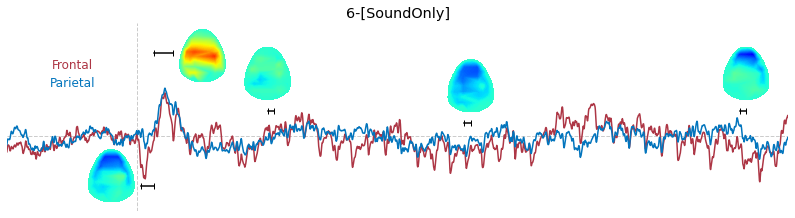

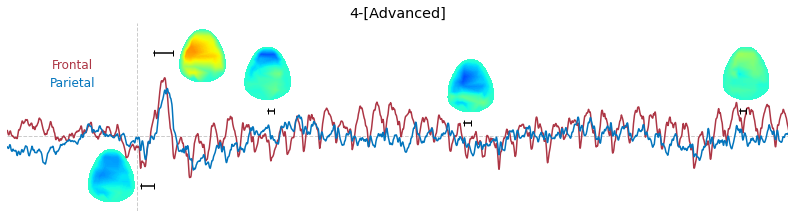

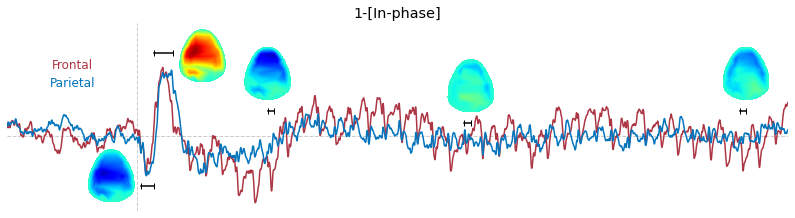

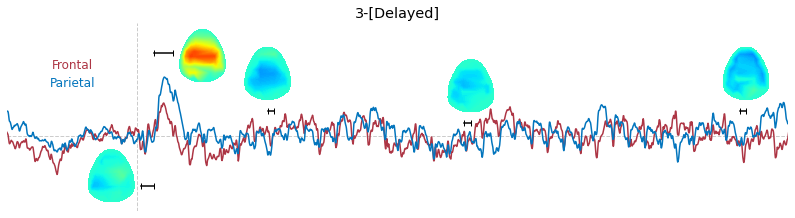

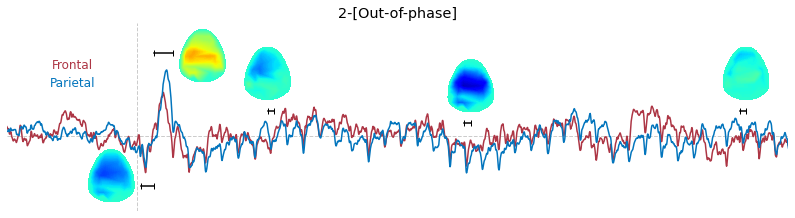

In [ ]:
# Demo 3-2. Raw voltage topography
clim = [-20,30]
for targetCondition in conditions:
  trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]

  # Calc ERP traces for visualization
  erp = np.mean(EEG.data[:,:,trialIdx],2)
  frontal_erp = np.mean(erp[ch_frontal[0]:ch_frontal[1],:],0)     # Average of frontal-area channels
  parietal_erp = np.mean(erp[ch_parietal[0]:ch_parietal[1],:],0)  # Average of parietal-area channels

  # Plot ERP trace
  plt.figure(figsize=(14,20))
  plt.subplot(len(conditions),1,np.where(np.array(conditions)==targetCondition)[0]+1)
  color_f = (.68,.210,.27) # Custom color value
  color_p = (.01,.457,.74)
  plt.grid('off')
  plt.plot((0,0),(-30,45), '--', linewidth = 1, color = (.8,.8,.8))
  plt.plot((-.2,1), (0,0), '--', linewidth = 1, color = (.8,.8,.8))
  plt.plot( EEG.times, frontal_erp,  color= color_f)
  plt.plot( EEG.times, parietal_erp, color= color_p)
  plt.xlabel('Time (msec)')
  plt.xlim((-.2,1))
  plt.ylim((-30,45))
  plt.axis('off')
  plt.gca().set_facecolor((1,1,1))
  plt.text( -.1, 27, 'Frontal', ha='center', fontsize=12, color=color_f )
  plt.text( -.1, 20,'Parietal', ha='center', fontsize=12, color=color_p )
  plt.title('%s'%condNames[targetCondition-1])
  
  # Calculate topography data 
  t_slice = [  (.005, .025), (.0250, .0550), (.200, .210),(.502, .512), (.925, .935)  ]  
  y_mark = [-20, 33, 10, 5, 10]
  topos = []
  for tIdx in range(len(t_slice)):
    x_start, x_end, y_pos = t_slice[tIdx][0], t_slice[tIdx][1], y_mark[tIdx]
    idx_start, idx_end = np.where(EEG.times==x_start)[0][0], np.where(EEG.times==x_end)[0][0]
    plt.plot( EEG.times[[idx_start,idx_end]], [y_pos, y_pos], 'k|-')
    topo_in = np.mean( erp[:36,idx_start:idx_end],1 )
    # bad-channel replacement
    topo_in[bad_channels] = np.median( topo_in.flatten() ) 
    topos.append( plot_topo2d(topo_in, plot_opt = False)[2] ) # Save it for drawing

  # Draw topography on ERP trace
  topo_size = (.07, 21) # X, Y size of topo image
  topo_shift = [ (-.04, -16), (.10, 32), (.20, 25), (.512, 20), (.935, 25) ]
  topo_clim = np.linspace(clim[0],clim[1],200)
  for tIdx in range(len(t_slice)):
    topo_x = np.linspace(topo_shift[tIdx][0]-topo_size[0]*.5,topo_shift[tIdx][0]+topo_size[0]*.5,topos[tIdx].shape[0])
    topo_y = np.linspace(topo_shift[tIdx][1]-topo_size[1]*.5,topo_shift[tIdx][1]+topo_size[1]*.5,topos[tIdx].shape[1])
    plt.contourf( topo_x, topo_y, topos[tIdx], cmap=cm.jet, levels=topo_clim )
  plt.draw()
plt.gcf().savefig(dir_fig+'fig3-2.png', format='png', dpi=300);

### 3-3. Band-limited power topography

Other than raw voltage, topography of band-limited power at stimulation frequency (40 Hz) can be drawn as well. In this example, stimulus-evoked 40 Hz power were estimated using <code>bandpower()</code> function.  

To demonstrate the effect of stimulation, stimulus-free periods (e.g., pre- and post-stimulus period) data are also obtained.

[0.0193375  0.02028398 0.00710901 0.00567469 0.00830723 0.01049608
 0.00185085 0.0013919  0.00112983 0.00769193 0.00557384 0.00546183
 0.00156436 0.01066352 0.0073918  0.01490612 0.00776711 0.01751805
 0.00088831 0.00787915 0.01215935 0.01038921 0.00865897 0.00700281
 0.00350638 0.0029922  0.00368539 0.00547492 0.0047954  0.00237509
 0.00433474 0.00524706 0.00552438 0.00166043 0.00552438 0.00072566]
[1.13128096 1.24041827 0.80170359 0.88595768 0.91743913 1.11485768
 0.49818729 0.63237692 0.58441142 0.89478615 0.22675501 0.31494574
 0.33766396 0.84440791 0.0514823  0.17139621 0.04189495 0.3427586
 0.0881341  0.65052435 0.04006881 0.01772902 0.01892983 0.12707376
 0.00839429 0.40688002 0.22908389 0.05149154 0.04779685 0.04007558
 0.00487939 0.23290276 0.27342071 0.24849435 0.27342071 0.03031742]
[1.39408591 1.41625252 1.17870257 1.26166593 1.35257691 1.35753242
 0.9852675  1.04393779 1.06534147 1.19268892 0.76640388 0.63741737
 0.78767937 1.00732412 0.41998132 0.56666665 0.37342532 0.667

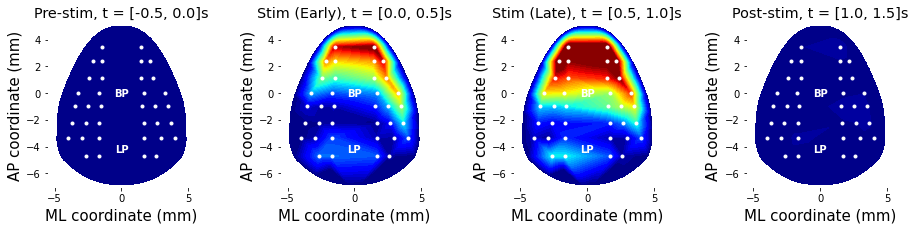

In [ ]:
# Demo 3-3. Band-power topography: ERP response as a function of time and space
def get_band_power(x, targetBand, Fs=2000):
  if x.ndim==1:
    X, freq = fft_half(x,Fs)
    ind = np.where( (freq > targetBand[0]) & (freq <= targetBand[1]))
    power = np.mean( abs(X[ind])**2 )
  else:
    power = np.zeros( x.shape[0] )
    for ch in range(x.shape[0]):
      X,freq = fft_half(x[ch,],Fs)
      ind = np.where( (freq > targetBand[0]) & (freq <= targetBand[1]))
      power[ch]=np.mean( abs(X[ind])**2 )
  return power

targetCondition = 6 # = Auditory sound only
trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]
erp = np.mean(EEG.data[:,:,trialIdx],2)
period = [ (-.5,0.), (0.,.5), (.5, 1.), (1.,1.5) ] # time in second
periodName = ['Pre-stim', 'Stim (Early)', 'Stim (Late)', 'Post-stim'];
freq = 40 # Hz
plt.figure(figsize=(16,3))
for periodIdx in range(len(period)):
  tIdx = (EEG.times>period[periodIdx][0]) & (EEG.times<=period[periodIdx][1])
  
  # Calculate power & Substitute bad-channel value
  power = get_band_power(erp[:36,tIdx], np.array([-2,2])+freq, EEG.info['sfreq'])
  power[bad_channels]= np.median(power.flatten())
  print(power)
  
  # Draw
  plt.subplot(1,len(period),periodIdx+1)
  plot_topo2d(power, clim=(0,1.2) )
  plt.title('%s, t = [%.1f, %.1f]s'%(periodName[periodIdx],period[periodIdx][0],period[periodIdx][1]))
#plt.gcf().savefig(dir_fig+'fig3-3.png', format='png', dpi=300);



### 3-4. Band-power topography: Comparison across various experimental conditions

Applying the same routine above, power topography figures of five different experimental conditions can be drawn as below.

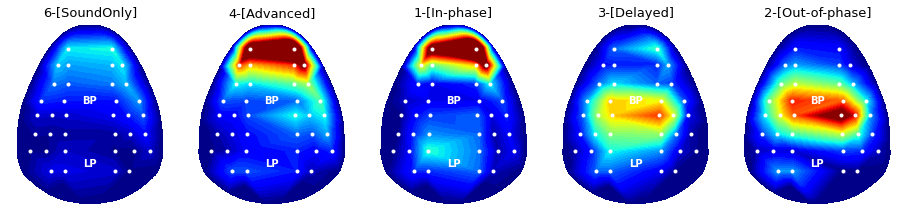

In [ ]:
# Demo 3-4. Band-power topography: Summary comparison across various stimulus conditions
freq = 40 # Hz
plt.figure(figsize=(16,4))
conditions = [6,4,1,3,2]
tIdx = (EEG.times>0) & (EEG.times<=1)
for targetCondition in conditions:
  trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]
  erp = np.mean(EEG.data[:,:,trialIdx],2)
  
  # Calculate power & Substitute bad-channel value
  power = get_band_power(erp[:36,tIdx], np.array([-2,2])+freq, EEG.info['sfreq'])
  power[bad_channels]= np.median(power.flatten())
  
  # Draw
  plt.subplot(1,len(conditions),np.where(np.array(conditions)==targetCondition)[0]+1)
  plot_topo2d(power, clim=(0,7/4) )
  plt.title('%s'%condNames[targetCondition-1], fontsize = font_size)
  plt.axis('off')
  if targetCondition is not conditions[0]: plt.ylabel('')
  
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.gcf().savefig(dir_fig+'fig3-4.png', format='png', dpi=300);

### 4-1. Appendix: Power topography of Dataset 1

So far, we've looked through basic analyses of Dataset 2.  

Same methods such as fourier transform and power topography can be applied to Dataset 1, as follow.



...skipping already existing file [/content/dataset/meta.csv]...
...skipping already existing file [/content/dataset/montage.csv]...
...copying to [/content/dataset/dataset_1/epochs_animal3.set]...
...copying to [/content/dataset/dataset_1/epochs_animal3.fdt]...
...copying to [/content/dataset/dataset_2/epochs_animal3.set]...
...copying to [/content/dataset/dataset_2/epochs_animal3.fdt]...


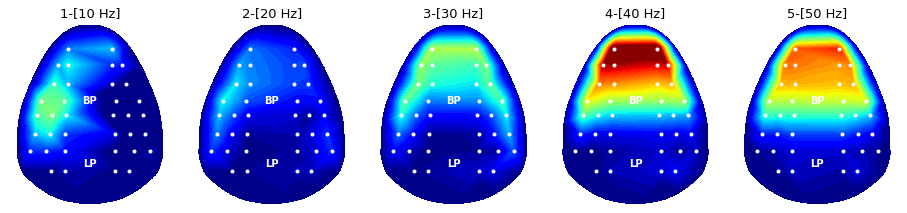

In [ ]:
# Demo 4-1. Band-power topography of Dataset 1

# Data loading
animal_id = 2 # Good
download_dataset(animal_list=[animal_id+1])
EEG,f_name = get_eeg_data( animal_idx = animal_id, dataset_idx = 1 ) 

#tIdx = (EEG.times>0) & (EEG.times<=1)
tWin = [.2, 1]
tIdx = (EEG.times>tWin[0]) & (EEG.times<=tWin[1])

tWin_prestim = [-.8, 0]
tIdx_prestim = (EEG.times>tWin_prestim[0]) & (EEG.times<=tWin_prestim[1])

# Power
pows = np.zeros((36,5))
condNames = ['1-[10 Hz]', '2-[20 Hz]', '3-[30 Hz]', '4-[40 Hz]', '5-[50 Hz]'];
plt.figure(figsize=(16,4))

for condition in range(1,len(condNames)+1):
  trialIdx = np.where(EEG.events[:,2]==EEG.event_id[condNames[condition-1]])[0]
  erp = np.mean(EEG.data[:36,:,trialIdx],2)
  freq = condition * 10
  power = get_band_power(erp[:36,tIdx], np.array([-2,2])+freq, EEG.info['sfreq'])
  power_prestim = get_band_power(erp[:36,tIdx_prestim], np.array([-2,2])+freq, EEG.info['sfreq'])

  # Draw
  plt.subplot(1,5,condition)
  plot_topo2d(power - power_prestim, clim=(0,1.2) )

  plt.title('%s'%condNames[condition-1], fontsize = font_size)
  plt.axis('off')

# Save
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.gcf().savefig(dir_fig+'fig4-1.png', format='png', dpi=300);

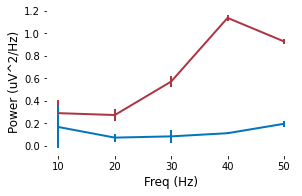

In [ ]:
# Demo 4-1. Evoked-power summary statistics of Dataset 1
condNames = ['1-[10 Hz]', '2-[20 Hz]', '3-[30 Hz]', '4-[40 Hz]', '5-[50 Hz]'];
 
# Calculate
pow_frontal, pow_parietal = [], []
for condition in range(1,len(condNames)+1):
  trialIdx = np.where(EEG.events[:,2]==EEG.event_id[condNames[condition-1]])[0]
  erp = np.mean(EEG.data[:36,:,trialIdx],2)
  freq = condition * 10
  power = get_band_power(erp[:36,tIdx], np.array([-2,2])+freq, EEG.info['sfreq'])
  power_prestim = get_band_power(erp[:36,tIdx_prestim], np.array([-2,2])+freq, EEG.info['sfreq'])
  pow_frontal.append( (power-power_prestim)[ch_frontal[0]:ch_frontal[1]] )
  pow_parietal.append( (power-power_prestim)[ch_parietal[0]:ch_parietal[1]] )

# Draw
plt.figure(figsize=(16,3)); plt.subplot(1,3,3)
x = [10,20,30,40,50]
plt.errorbar(x, np.mean(np.array(pow_frontal),axis=1), np.std(np.array(pow_frontal),axis=1), ecolor = color_f, color=color_f, linewidth=2)
plt.errorbar(x, np.mean(np.array(pow_parietal),axis=1), np.std(np.array(pow_parietal),axis=1), ecolor = color_p, color=color_p, linewidth=2) 
plt.xticks( x )
plt.xlabel('Freq (Hz)')
plt.ylabel('Power (uV^2/Hz)')
plt.gca().set_facecolor((1,1,1))
plt.subplots_adjust(wspace=.3, hspace=.1, bottom=.2)
plt.gcf().savefig(dir_fig+'fig4-2.png', format='png', dpi=300);

Enjoy!

In [ ]:
# Try on your on!
EEG


<EpochsEEGLAB  |   434 events (all good), -0.8 - 1.7995 sec, baseline off, ~654.4 MB, data loaded,
 '1-[10 Hz]': 96
 '2-[20 Hz]': 95
 '3-[30 Hz]': 97
 '4-[40 Hz]': 53
 '5-[50 Hz]': 93>